<a href="https://colab.research.google.com/github/nafkem/Hamoye-Internship/blob/main/Stage_E_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
!pip install fbprophet

In [78]:
df = pd.read_csv("/content/time series.csv")

In [81]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [84]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [85]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Tmax         231.696688
SysLoad      797.623357
GasPrice       6.016163
ElecPrice     65.798356
dtype: float64

In [86]:
df.shape

(92016, 5)

In [87]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [88]:
df.tail()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [89]:
#Converting FullDate to date time
df['FullDate'] = pd.to_datetime(df['FullDate'])

In [90]:
#set FullDate as index so i can resample 
df.set_index('FullDate',inplace=True)

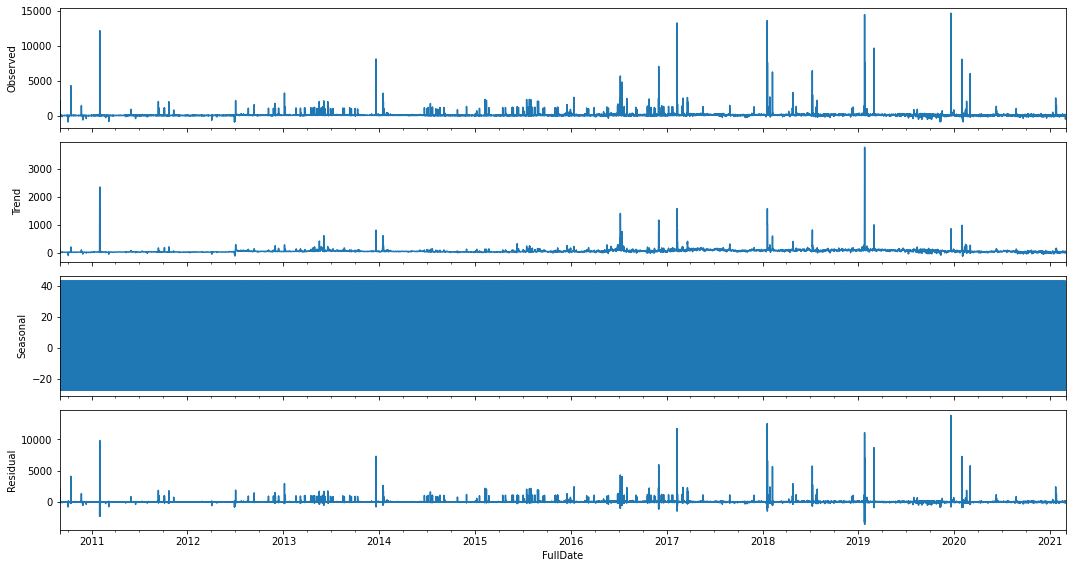

In [91]:
#Exploring the time series using decompose
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['ElecPrice'], model='additive')
decompose_series.plot()
plt.show()

In [92]:
#resampling
df_daily = df.resample('D').sum()


In [93]:
df_daily.head()


,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [94]:
#splitting into train and test
train_df = df_daily[:2757]
test_df = df_daily[2757:]

In [95]:
from fbprophet import Prophet

In [96]:
#Model building and fitting data
model = Prophet()


In [97]:
train_df.reset_index(inplace=True)

In [98]:
test_df.reset_index(inplace=True)

In [100]:
#resetting index so i can have the FullDate as columns
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

train_df = train_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
train_df = train_df[['ds', 'y']]
train_df.head()

univar_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()



test_df = test_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_df = test_df[['ds', 'y']]
test_df.head()


,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [102]:
model.fit(train_df)
train_df = train_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
train_df = train_df[['ds', 'y']]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [103]:
#Prediction
uni_var_future = model.make_future_dataframe(periods=1077, freq='D') 
univar_forecast = model.predict(uni_var_future)



univar_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

test_df = test_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_df = test_df[['ds', 'y']]
test_df.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70
